### What is Centroid-based Methods?
- Centroid-based clustering organizes data points around central protypes called centroids, where each cluster is represented by the mean(centroid) of its members.
- The number of clusters is specified in advance and thealgorithm allocates points to the nearest centroid, making this technique efficient for spherical and similarly sized clusters but sensitive to outliers and initialization.
- Algorithms -
  1. K-Means - Iteratively assigns points to nearest centroid and recalculates centroid to minimize intra-cluster variance.
  2. K-medoids - Similar to K-means but uses actual data points as centers, robust to outliers.


### K-Means Clustering:
- It groups similar data points into clusters without needing labeled data.
- It is used to uncover hidden patterns when the goal is to organize data based on similarity.
  - Helps identify natural groupings in unlabelled datasets.
  - Works by grouping points based on distance to cluster centers.
  - Commonly used in customer segmentation, image compression, and pattern discovery.
  - Useful when you structure from raw, unorganized data.
### How Algorithm works:
- Initialization - We begin by randomly selecting k cluster centroids.
- Assignment Step - Each data point is assigned to the nearest centroid, forming clusters.
- Update Step - After the assignment, we recalculate the centroid of each cluster by averaging the points within it.
- Repeat - This is repeat until the centroids no longer or the maximum number of iterations is reached.

### Why Use K-Means Clustering?
- It is popular in a wide variety of applications due to its simplicity, efficiency, and effectiveness.
- Here's why it is widely used -
  1. Data Segmentation - One of the most common uses of K-Means is segmenting data into distinct groups.
  2. Image compression - K-Means can be used to reduce the complexity of images by grouping similar pixels into clusters, effectively compressing the image. This is useful for image storage and processing.
  3. Anomaly Detection - K-Means can be applied to detect anomalies or outliers by identifying data points that do not belong to any of the clusters.
  4. Document Clstering - In NLP, K-Means is used to group similar documents or articles together. It's often used in applications like recommendation systems or new categories.
  5. Organizing Large Datasets - When dealing with large datasets, K-Means can help in organizing the data into smaller, more manageable chunks based on similarities, improving the efficiency of data analysis.

### Implementing of K-Means Clustering:
#### 1. Importing necessary Libraries:
- Numpy - For numerical operations.
- Matplotlib - For plotting data and results.
- Scikit-learn - To create a synyhetic dataset using make_blobs.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

#### 2. Creating Custom Dataset:
- We will generate a synthetic dataset with make_blobs.
  1. make_blobs(n_samples=500, n_features=2, centers=3) - Generates 500 data points in a 2D space, grouped into 3 clusters.
  2. plt.scatter(X[:0,], X[:1]) - Plots the datasets in 2D, showing all the points.
  3. plt.show() - Display the plot.

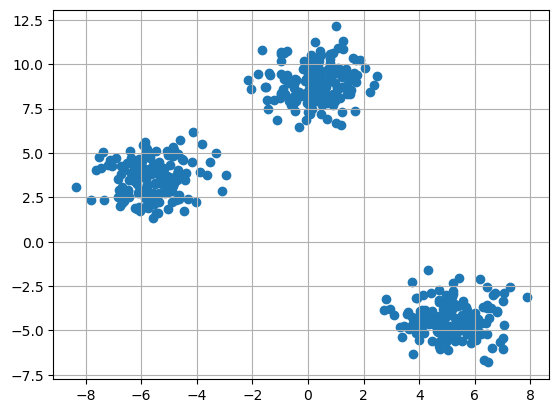

In [11]:
X, y = make_blobs(n_samples=500, n_features=2, centers=3, random_state=23)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0], X[:,1])
plt.show()

#### 3. Initializing Random Centroids:
- We will randomly initialize the centroids for K-Means clustering.
  1. np.random.seed(23) - Ensures the reproducibility by fixing the random seed.
  2. The for loop initializes k random centroids, with values between -2 and 2, for a 2D dataset.

In [12]:
k = 3
clusters = {}
np.random.seed(23)
for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
    'center' : center,
    'points' : []
    }
    clusters[idx] = cluster

clusters

{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

#### 4. Plotting Random Initialized Center with Data Points:
- We will now plot the data points and the initial centroids.
  1. plt.grid() - Plot the grid.
  2. plt.scatter(center[0], center[1], marker = '*', c = 'red') - Plots the cluster center as a red star(* marker).

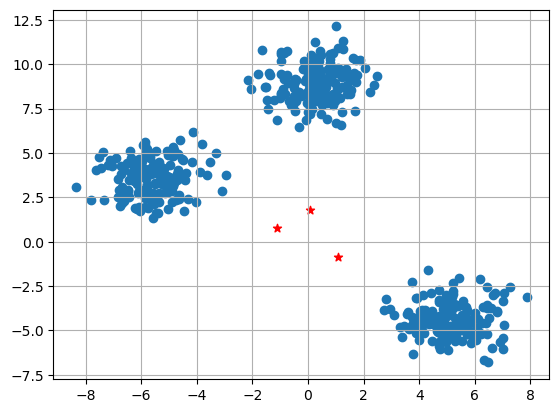

In [13]:
plt.scatter(X[:,0], X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], marker = '*', c='red')
plt.show()

#### 5. Defining Euclidean Distance:
- To assign data points to the nearest centroid, we define a distance function.
  1. np.sqrt() - Computes the square root of a number or array element-wise.
  2. np.sum() - Sums all elements in an array or along a specified axis.


In [14]:
def distance(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

#### 6. Creating Assign and Update Functions:
- Next, we define functions to assign points to the nearest centroid and update the centroid based on the average of the points assigned to each cluster.
  1. dist,append(dis) - Appends the calculated distance to the list dist.
  2. curr_cluster = np.argmin(dist) - Finds the index of the closest cluster by selecting the minimum distance.
  3. new_center = points.mean(axis=0) - Calculates the new centroid by taking the mean of the points in the cluster.

In [19]:
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []

        curr_x = X[idx]
        for i in range(k):
            dis = distance(curr_x, clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis=0)
            clusters[i]['center'] = new_center

            clusters[i]['points'] = []
    return clusters

#### 7. Predicting the Cluster for the Data Points:
- We create a function to predict the cluster for each data point based on the final centroids.
  1. pred.append(np.argmin(dist)) - Appends the index of the closest cluster (the one with the minimum distance) to pred. 

In [20]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i], clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

#### 8. Assigning, Updating and Predicting the Cluster centers:
- We assign points to clusters, update the centroids and predict the final cluster labels.
  1. assign_clusters(X, clusters) - Assign the data points to the nearest centroids.
  2. update_clusters(X, clusters) - Recalculates the centroids.
  3. pred_cluster(X, clusters) - Predicts the final clusters for all data points.

In [21]:
clusters = assign_clusters(X, clusters)
clusters = update_clusters(X, clusters)
pred = pred_cluster(X, clusters)

#### 9. Ploting Data Points with Predicted Clusters centers:
- Finally, we plot the data points, colored by their predicted clusters, along with the updated centroids.
  1. center = clusters[i]['center'] - Retrives the center (centroid) of the current cluster.
  2. plt.scatter(center[0],center[1], marker='^', c='red') - Plots the cluster center as a red triangle (^ marker).

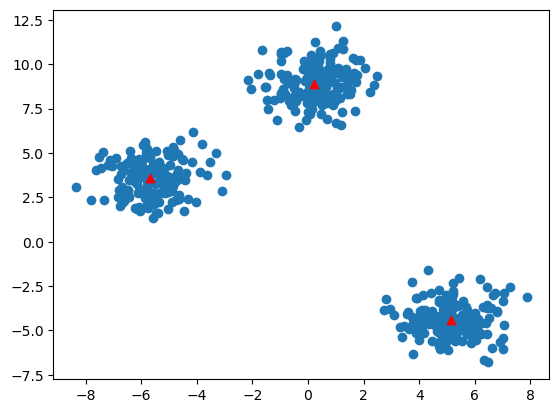

In [23]:
plt.scatter(X[:,0], X[:,1])
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1], marker='^', c='red')
plt.show()